In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [2]:
#Importing Gender Wage Gap (GWG) data which contains data at a state-year level from 2010-2019 for the United States
GWG=pd.read_csv("GWG.csv")

In [3]:
#Display all columns
pd.set_option('display.max_columns', None)
#Looking at data
GWG.head()

Unnamed: 0  Unnamed: 0.1  YEAR  STATEFIP         Inc_F         Inc_M  \
0           0             0  2010         1  14118.163660  23834.914909   
1           1             1  2010         2  16442.159236  26732.799363   
2           2             2  2010         4  15761.251816  25056.495374   
3           3             3  2010         5  13346.849246  20152.898660   
4           4             4  2010         6  18224.846550  28426.867406   

     Agelt30      Child     Child5      White      Black  \
0  22.572098  44.879242  12.493631  76.439417  19.993886   
1  25.000000  44.267516  13.789809  68.694268   2.834395   
2  23.621626  43.500038  13.164334  82.331575   3.471744   
3  22.772194  43.902848  12.822446  83.517588  11.951424   
4  23.940329  46.482008  13.133793  65.601362   4.516117   

   AmIndian_AlaskaNative   Chinese  Japanese     SEX     Prop_F    College  \
0               0.580862  0.219097  0.040762   19626  48.333843  55.834098   
1              16.687898  0.286624  0.286624    3140  45.541401  58.566879   
2               3.961153  0.711172  0.202646   26154  47.790013  60.709643   
3               0.678392  0.092127  0.025126   11940  49.003350  47.998325   
4               0.734084  4.129622  0.936898  156794  46.810465  61.605674   

         Mar    Constr        GWG party_simplified       state  Year_imp  \
0  61.240192  6.511770  59.233120       REPUBLICAN     ALABAMA       NaN   
1  57.643312  8.980892  61.505565       REPUBLICAN      ALASKA       NaN   
2  56.649079  5.658790  62.902858       REPUBLICAN     ARIZONA       NaN   
3  62.487437  7.294807  66.227938       REPUBLICAN    ARKANSAS       NaN   
4  56.122683  6.535964  64.111343         DEMOCRAT  CALIFORNIA    1984.0   

   Pay_Transp       Empt    GDP_pc   GWG_calc    log_GDP  DEMOCRAT  
0           0  51.411364  37039.21  40.766880  10.519732         0  
1           0  62.172996  74703.95  38.494435  11.221288         0  
2           0  49.655083  39195.05  37.097142  10.576306         0  
3           0  52.747196  34732.12  33.772062  10.455420         0  
4           1  52.633121  52359.20  35.888657  10.865883         1

In [4]:
list(GWG)

['Unnamed: 0',
 'Unnamed: 0.1',
 'YEAR',
 'STATEFIP',
 'Inc_F',
 'Inc_M',
 'Agelt30',
 'Child',
 'Child5',
 'White',
 'Black',
 'AmIndian_AlaskaNative',
 'Chinese',
 'Japanese',
 'SEX',
 'Prop_F',
 'College',
 'Mar',
 'Constr',
 'GWG',
 'party_simplified',
 'state',
 'Year_imp',
 'Pay_Transp',
 'Empt',
 'GDP_pc',
 'GWG_calc',
 'log_GDP',
 'DEMOCRAT']

In [5]:
conda install -c conda-forge ffmpeg

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Structure of Analysis:
1. EDA exploring various trends related to Gender Wage Gaps (GWGs)
2. Regression analysis

## EDA
1. Overall GWG trends by state will be examined
2. Explanatory variables will be observed as follows:
    - The variables of focus, Pay Transparency laws(i.e. whether the states has enacted a pay transparency law) and Party color of a state (the majority party as per presidential election results), will be examined in depth
    - Other demographic variables will be explored

## Overall GWG Trends

In [6]:
#Looking at GWG by State
GWG['state']=GWG['state'].str.title()

GWG['state'].unique()


list(GWG)

GWG['state'].unique()

#Intro State codes for plotly

state_codes = {
    'District Of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}



GWG['state_code'] = GWG['state'].apply(lambda x : state_codes[x])

GWG.loc[GWG['state_code'].isna()]

GWG_2019=GWG.loc[GWG['YEAR']==2019]
#Income['Inc_M']=np.where(Income['SEX']==1,Income['INCWAGE'],0)

GWG_2019

import plotly.express as px


fig = px.choropleth(GWG_2019,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='GWG_calc',
                    color_continuous_scale="peach",
                    labels={'GWG_calc':'Gender Wage Gap'}
                    
                    )
fig.add_scattergeo(
    locations=GWG_2019['state_code'],    ###codes for states,
    locationmode='USA-states',
    text=GWG_2019['state_code'],
    mode='text')
fig.show()

[Text(0.5, 0, 'State'), Text(0, 0.5, 'Gender Wage Gap')]

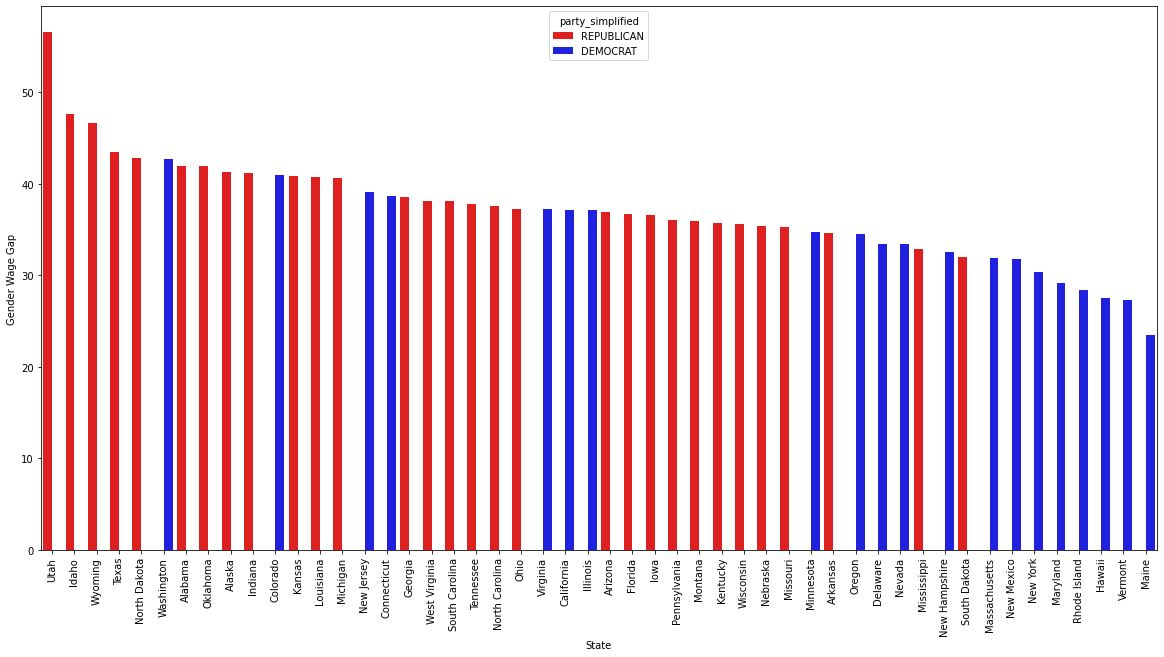

In [7]:
#Plotting GWG by State
plt.figure(figsize=(20,10))
ax=sns.barplot(data=GWG[GWG['YEAR']==2019].groupby(['state','party_simplified']).mean('GWG_calc').sort_values(by='GWG_calc',ascending=False).reset_index(),hue='party_simplified',palette=['r','b'],x='state',y='GWG_calc')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(xlabel='State', ylabel='Gender Wage Gap')


Findings:
1. Top 5 states are Republican: Utah, Idaho, Wyoming, Texas, North Dakota
2. Bottom 5 states are Democrat: Maine, Vermont, Hawai, Rhode Island, Maryland

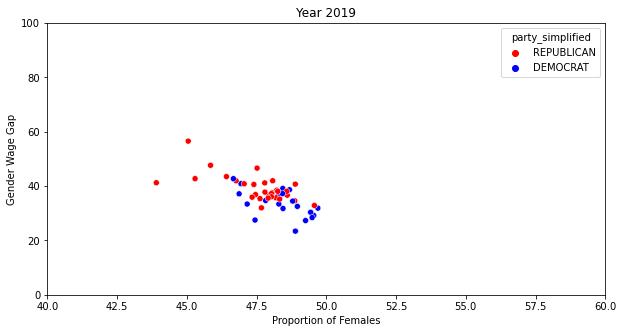

In [8]:
#Plotting GWG vs Proportion of Females over time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib.animation import FuncAnimation
# from IPython.display import display, clear_output
from IPython.display import HTML
import numpy as np
from matplotlib import animation, rc


fig, ax = plt.subplots(figsize=(10,5))
# 
def animate(i):
    ax.cla()
    year = 2010 + i
    sns.scatterplot(data=GWG[GWG['YEAR'] == year],x="Prop_F",y="GWG_calc",hue="party_simplified",palette=['red','blue'])
#                     ax = ax,
#                     alpha = 0.7,
#                     sizes = (50, 3000))
    ax.set_xlim(40,60)
    ax.set_ylim(0,100)
    ax.set_title(f'Year {year}')
    ax.set(xlabel='Proportion of Females', ylabel='Gender Wage Gap')

# plt.show()

anim = animation.FuncAnimation(fig, animate,
                               frames=10, interval=1200, blit=False)


HTML(anim.to_html5_video())


Findings
1. There is a negative relationship between GWG and Proportion of Females
1. Democrat states clusterered towards bottom right(low GWG and high proportion of females) while Republican states clustered towards upper left
2. These trends persists across years

In [9]:
#Checking if state with highest GWG is the same across years 
GWG.loc[GWG.groupby('YEAR').GWG_calc.agg('idxmax')][['YEAR','state','GWG_calc']]

YEAR state   GWG_calc
43   2010  Utah  55.065120
93   2011  Utah  57.255000
143  2012  Utah  54.185656
193  2013  Utah  58.855400
243  2014  Utah  58.378191
293  2015  Utah  55.756812
343  2016  Utah  57.405968
393  2017  Utah  56.508458
443  2018  Utah  56.582252
493  2019  Utah  56.536342

In [10]:
#Decribe GWG, Income of Females and Income of Males
GWG[['GWG_calc','Inc_F','Inc_M']].describe()

GWG_calc         Inc_F         Inc_M
count  500.000000    500.000000    500.000000
mean    37.540838  17067.752828  27388.814052
std      5.621339   3197.215564   4789.441862
min     20.776831  11394.959964  17488.400294
25%     34.713357  14838.401050  23958.375885
50%     37.211790  16452.001181  26727.395919
75%     40.457021  18716.744073  30021.460438
max     58.855400  27897.545586  44774.484468

Findings
1. GWG range between 20% and 60%
2. Range of Income for females is 11k-28k USD
3. Range of Income for males is 17.5k-45k USD

### Pay Transparency

In [11]:
#Examining Pay Transparency


#Defining a function to create line plots
def lineplt(d,y,h,l):

    g=sns.lineplot(data=d,x='YEAR',y=y,hue=h,palette=['b','r'])
    g.legend_.set_title(None)
    plt.tight_layout()
    plt.ylabel(l)
    # plts.ylabel("GWG")
    #s='KPMG/Out/'+y+'.png'
    #plt.savefig(s,facecolor='w')
    plt.show()
    plt.clf()

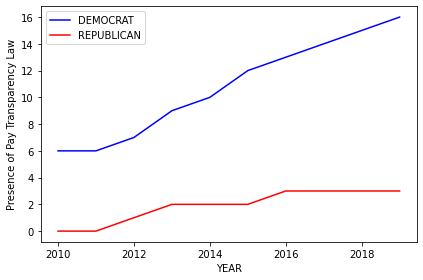

<Figure size 432x288 with 0 Axes>

In [12]:
#Trend over time
lineplt(GWG.groupby(['YEAR','party_simplified']).sum().reset_index(),'Pay_Transp','party_simplified','Presence of Pay Transparency Law')

Findings:
1. No. of states with pay transparency laws(PTLs) are much higher for Democrat states compared to Republican states across years
2. As of 2019, 16 Democrat states had PTLs while only 3 Republican states did

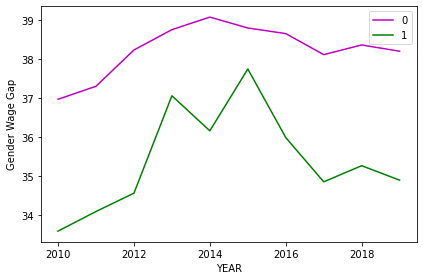

<Figure size 432x288 with 0 Axes>

In [13]:
#GWG for states with pay transparency laws vs states without
g=sns.lineplot(data=GWG.groupby(['YEAR','Pay_Transp']).mean().reset_index(),x='YEAR',y='GWG_calc',hue='Pay_Transp',palette=['m','g'])
g.legend_.set_title(None)
plt.tight_layout()
    # plts.xlabel("Year")
plt.ylabel("Gender Wage Gap")
    #s='KPMG/Out/'+y+'.png'
    #plt.savefig(s,facecolor='w')
plt.show()
plt.clf()


Findings:
1. GWG gaps for states without PTLs higher than those states with Transparency laws
2. GWG gaps for states with PTLs: 33-38%
3. GWG gaps for states with PTLs: 37-39%

Text(0, 0.5, 'No. of years of Pay Transparency Law enactment')

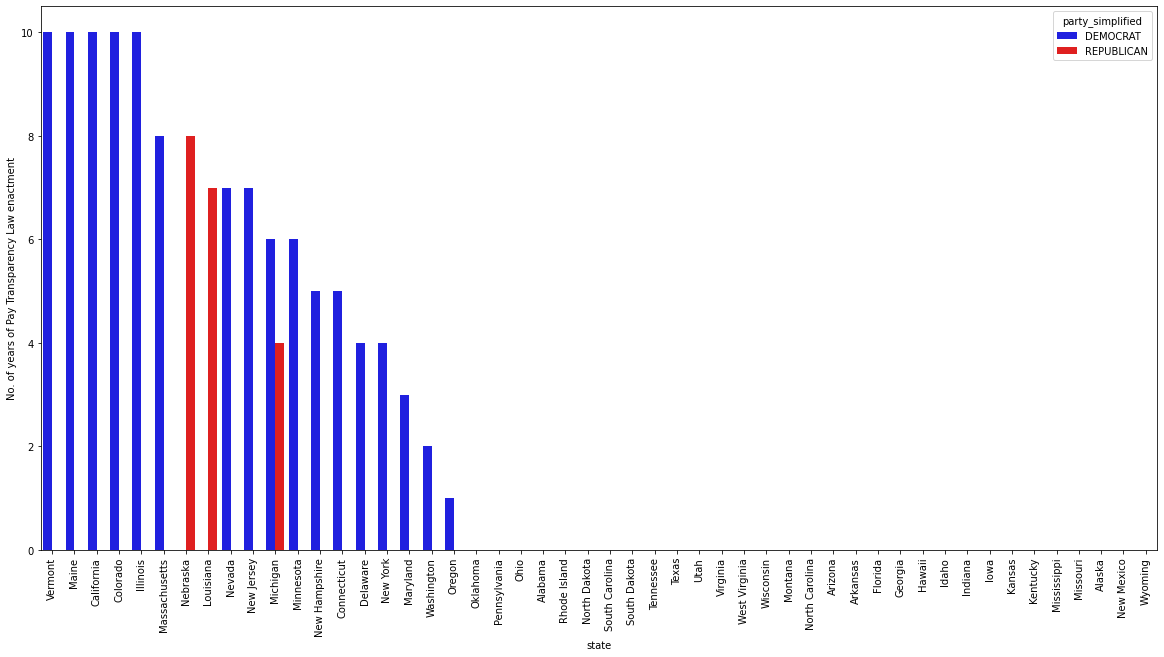

In [15]:
#Plotting duration of pay transparency by state
plt.figure(figsize=(20,10))
ax=sns.barplot(data=GWG.groupby(['state','party_simplified']).sum('Pay_Transp').sort_values(by='Pay_Transp',ascending=False).reset_index(),hue='party_simplified',palette=['b','r'],x='state',y='Pay_Transp')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('No. of years of Pay Transparency Law enactment')

Findings:
5 states with PTLs implemented for the longest(10 years): Vermont, Maine, California, Colorado and Illinois
All of these are Democrat states

Text(0, 0.5, 'Gender Wage Gap')

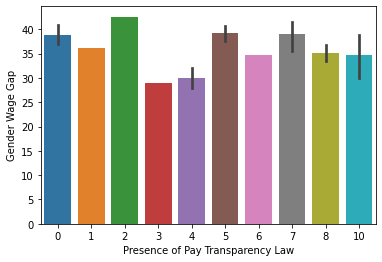

In [16]:
#Pay Transparency duration vs GWG
sns.barplot(data=GWG.groupby(['state']).agg({'Pay_Transp':'sum','GWG_calc':'mean'}).reset_index(),x='Pay_Transp',y='GWG_calc')
plt.xlabel('Presence of Pay Transparency Law')
plt.ylabel('Gender Wage Gap')

Findings:
There does not seem to be a strong correlation between duration of implementation of PTL and GWG

C:\Users\Sanya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Gender Wage Gap')

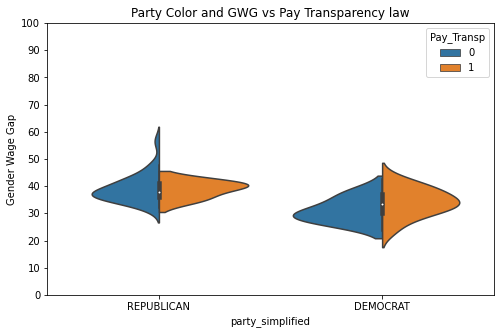

In [18]:
#Violin plot of GWG vs Pay transparency by party
f,ax=plt.subplots(figsize=(8,5))
sns.violinplot("party_simplified","GWG_calc", hue="Pay_Transp", data=GWG[GWG['YEAR']==2019],split=True)
ax.set_title('Party Color and GWG vs Pay Transparency law')
ax.set_yticks(range(0,110,10))
ax.set_ylabel('Gender Wage Gap')

Findings:
1. GWG is higher for states with PTL vs those without across Democrat and Republican states
2. GWG for Republican states with and without PTL laws higher than Democrat states
3. Gap between those who have and don't have PTL laws appears to be higher amongst Democrat states

### Party Color

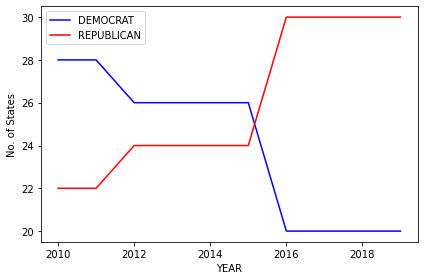

<Figure size 432x288 with 0 Axes>

In [22]:
# No. of States by Party Color
lineplt(GWG.groupby(['YEAR','party_simplified']).count().reset_index(),'state','party_simplified','No. of States')

Findings:
1. No. of democrat states were more than Republican states till 2016
2. As of 2019, there were 30 Republican states and 20 Democrat states

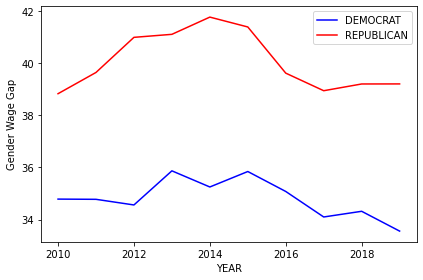

<Figure size 432x288 with 0 Axes>

In [23]:
#GWG by party color

lineplt(GWG.groupby(['YEAR','party_simplified']).mean().reset_index(),'GWG_calc','party_simplified','Gender Wage Gap')

Findings:
1. GWG in Republican states are consistently higher than GWG in Democrat states
2. GWG have fluctuated between 33-36% for Democrat states and between 38-42% for Republican states

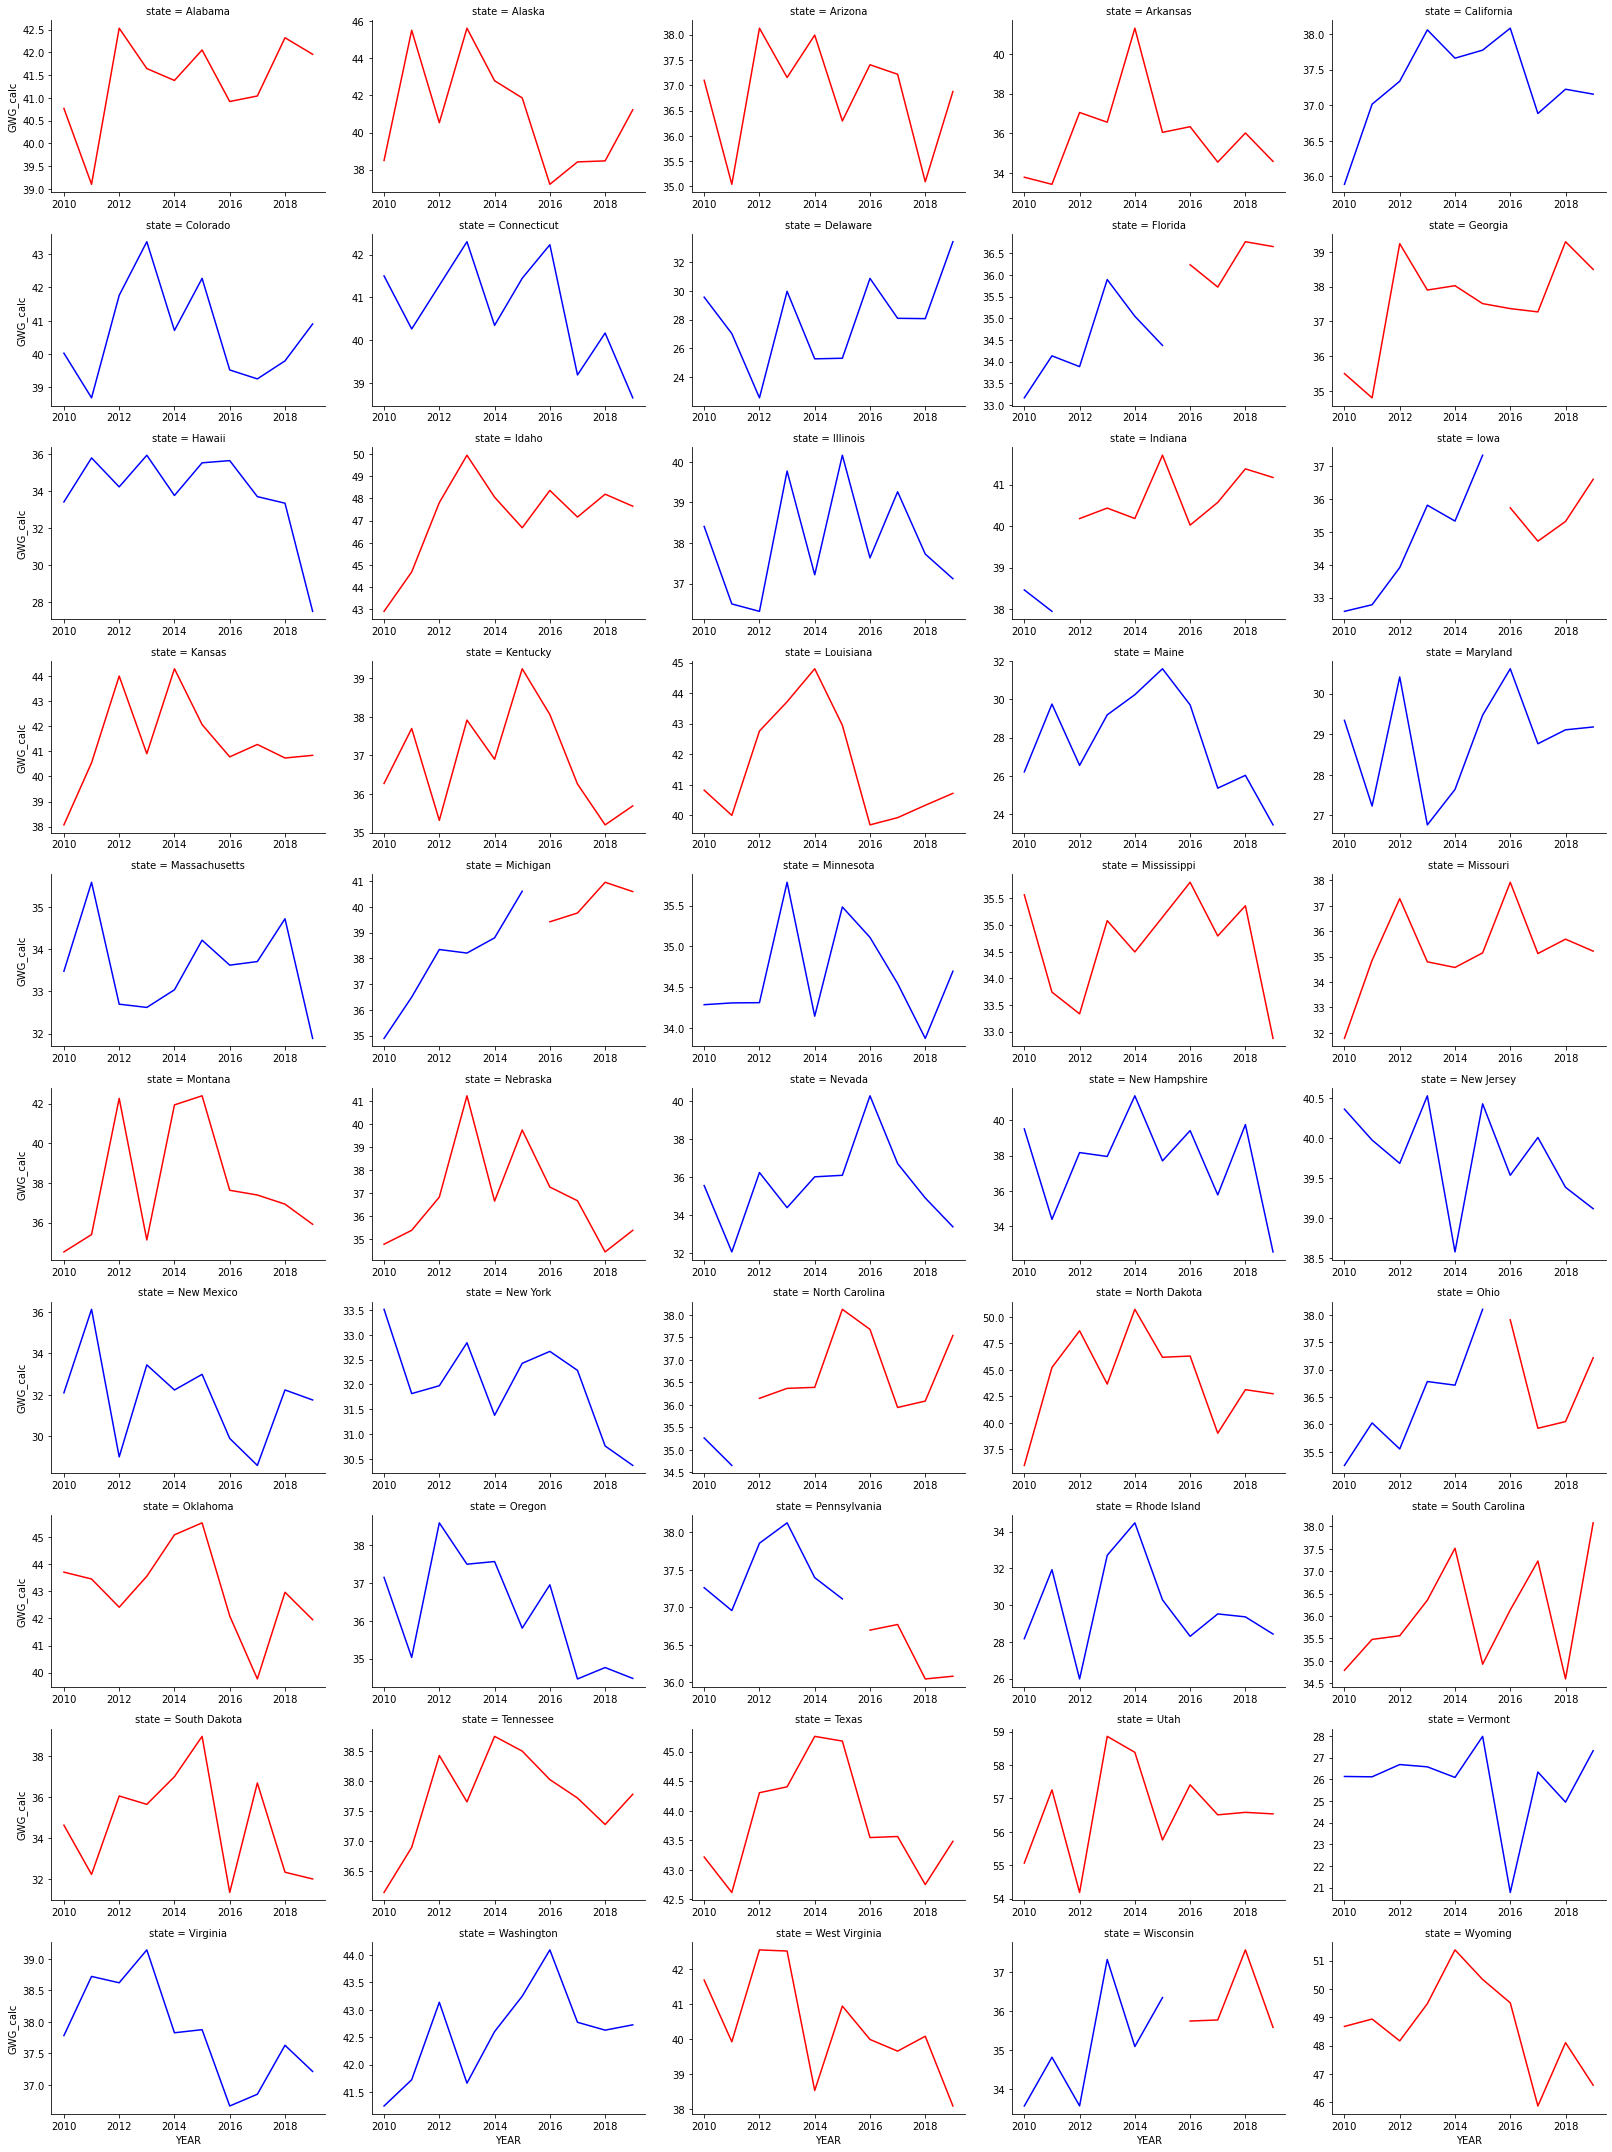

In [24]:
#Looking at GWG trends over time by State

g=sns.FacetGrid(GWG,col='state',sharex=False,sharey=False,col_wrap=5,height=3,aspect=1.5,hue='party_simplified',palette=['r','b'])
g.map_dataframe(sns.lineplot,x='YEAR',y='GWG_calc')

Findings:
1. For states switching from blue to red, some seem to be on the uptick of GWG leading up to the 2016 presidential election such as  Michigan and Wisconsin
2. Pennsylvania has seen a fall in GWG after switching from blue to red

# Other Determinants

In [25]:
#Examining other determinants: 
# •Proportion of youth (i.e. age less than 30)
# •Proportion with children
# •White population
# •Proportion of Females
# •Proportion who are married
# •Employment Rate
# •GDP per capita
# •Percentage in Construction

#Creating a list of these variables
l=[
 'Agelt30',
 'Child',
 'Child5',
 'White',
 'Prop_F',
 'College',
 'Mar',
 'Empt',
'Constr']

In [26]:
l_lab={
 'Agelt30':'Percentage of Youth(age less than 30)',
 'Child':'Percentage of those with children',
 'Child5':'Percentage of those with children less than 5',
 'White':'Percentage of White race',
 'Prop_F':'Percentage of Females',
 'College':'Percentage with at least 1 year of college education',
 'Mar':'Percentage married',
 'Empt':'Employment Rate',
 'Constr':'Percentage working in Construction industry'}

In [27]:
l_lab['Agelt30']

'Percentage of Youth(age less than 30)'

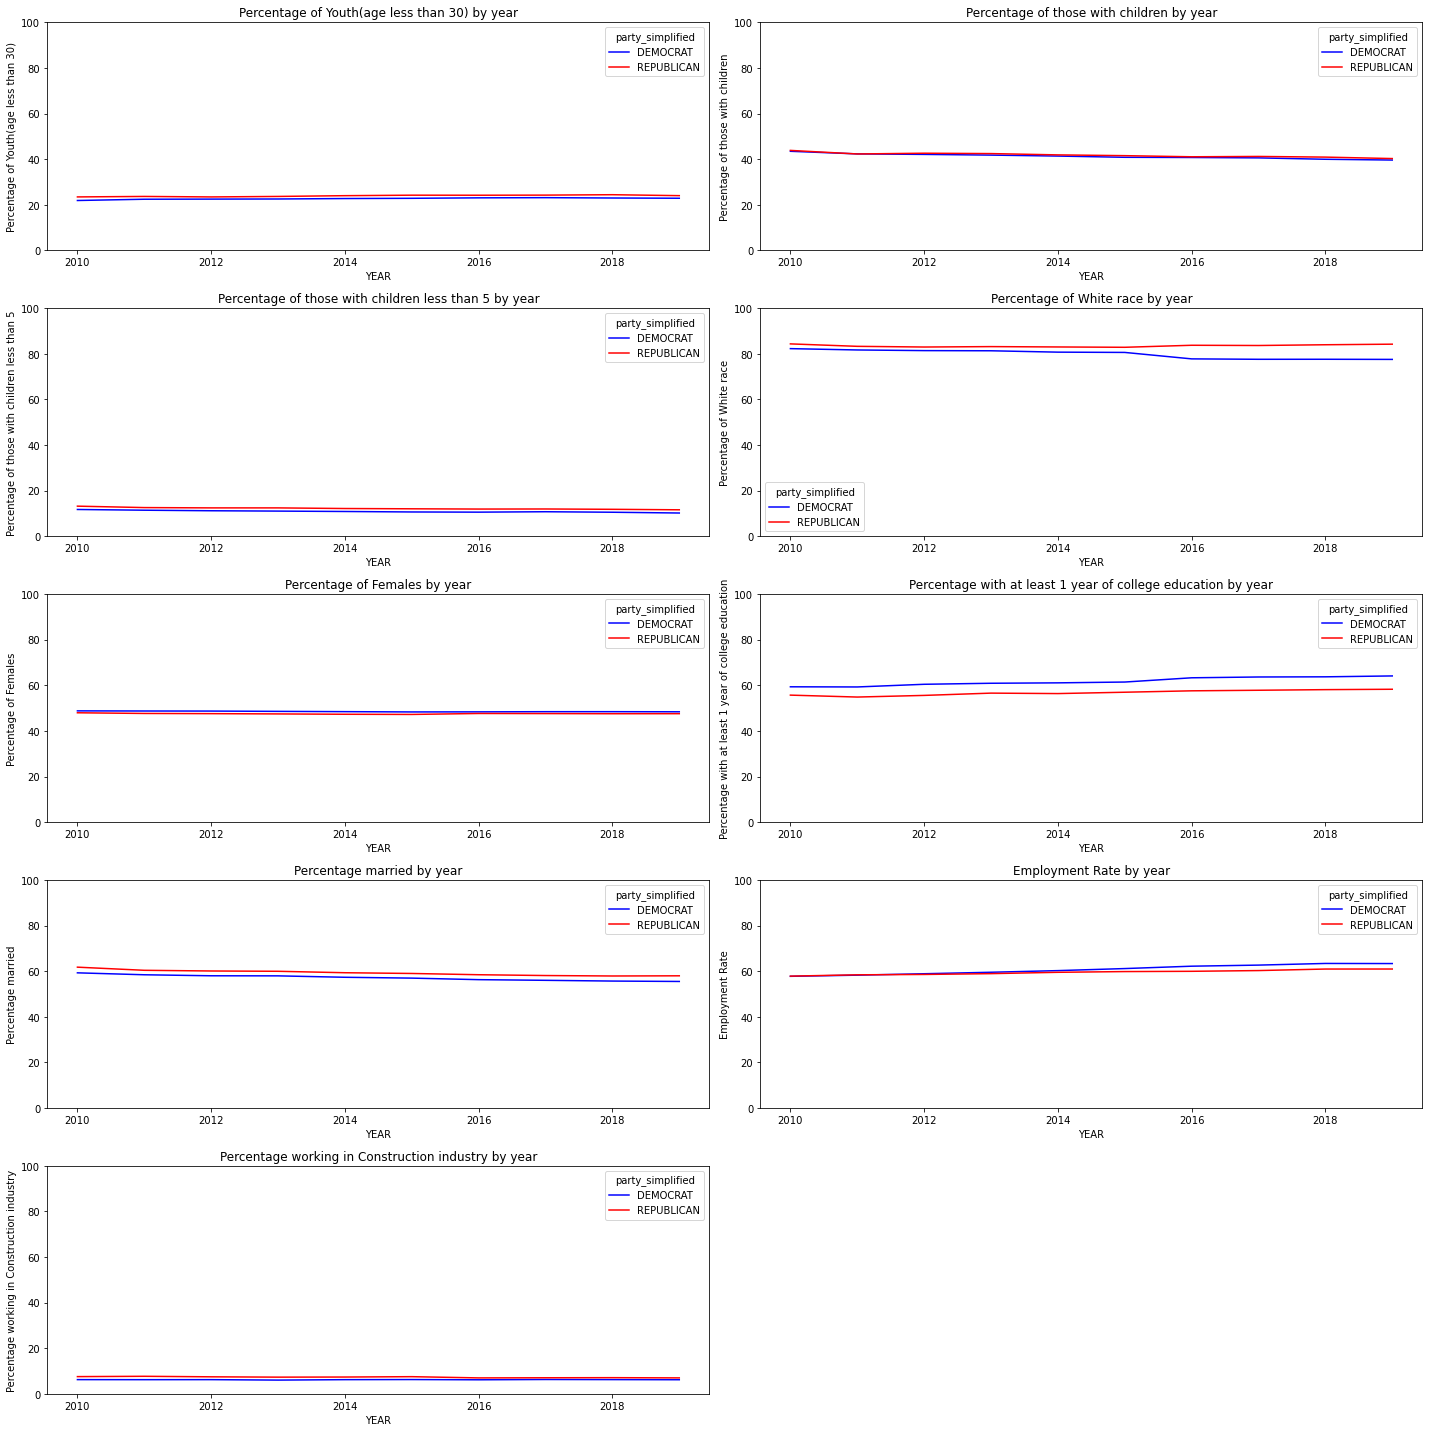

In [28]:
#Line plots of determinant over time
count=1
plt.subplots(figsize=(20, 20))
for v in l:
    plt.subplot(5,2,count)
    g=sns.lineplot(data=GWG.groupby(['YEAR','party_simplified']).mean(),x='YEAR',y=v,hue='party_simplified',palette=['b','r'])
    plt.title(l_lab[v]+' by year')
    plt.tight_layout()
    plt.ylabel(l_lab[v])
    plt.ylim(0,100)
    count+=1

plt.show()

Findings:
1. Trend over time for variables is steady
2. Republican and Democrat states have similar features. Some things to note are:
    - Republican states have slightly higher proportion of youth, children less than 5, white population, married population and population engaged in the construction industry
    - Democrat states have slightly higher proportion of college graduates than Republican states
    - White population diverges between Republican and Democrat states in 2016

In [29]:
#Examining why there is a divergence in percentage of white population between Democrat and Republican states in 2016
GWG=GWG.sort_values(by=['state','YEAR'])
GWG['lag_party']=GWG['party_simplified'].shift(1)
GWG16=GWG[GWG['YEAR']==2016]
GWG16[(GWG16['party_simplified']=='REPUBLICAN')&(GWG16['party_simplified']!=GWG16['lag_party'])][['state','White']]


state      White
308       Florida  79.685557
314          Iowa  94.868081
321      Michigan  86.652004
334          Ohio  87.522604
337  Pennsylvania  89.487685
348     Wisconsin  93.008606

Findings:
States with considerably high white populations transitioned from blue to red states in the 2016 presidential election

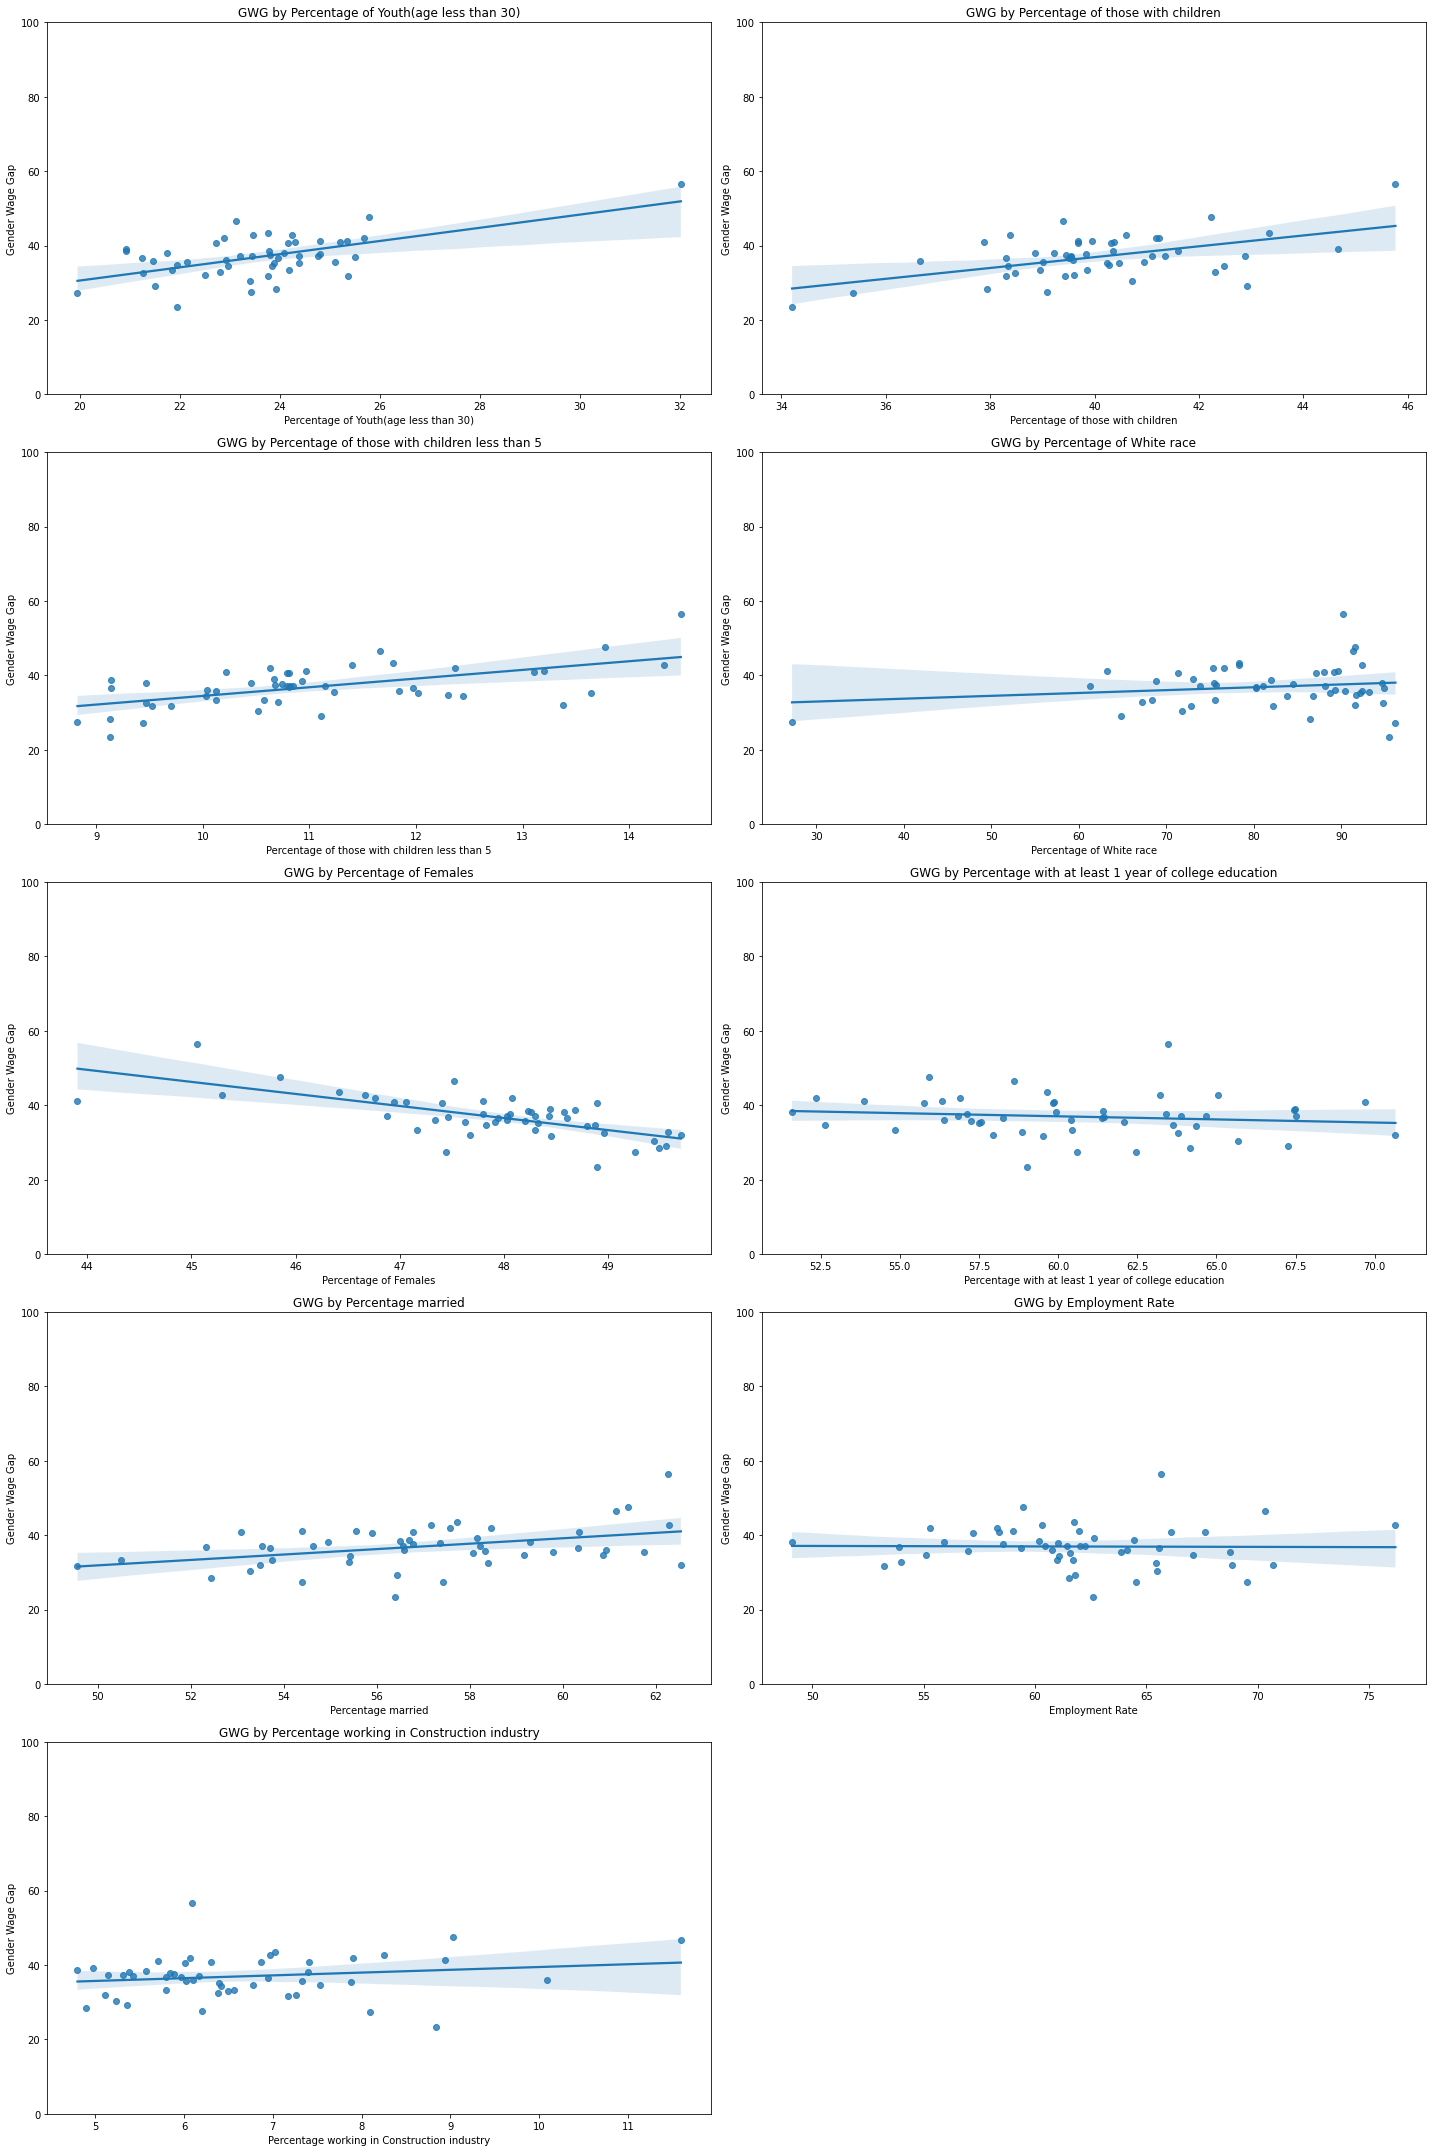

In [30]:
#Scatter plots of GWG vs determinant for 2019
count=1
plt.subplots(figsize=(20, 30))
for v in l:
    plt.subplot(5,2,count)
    g=sns.regplot(data=GWG[GWG['YEAR']==2019],x=v,y='GWG_calc',fit_reg=True)
#     ,hue="party_simplified" ,palette=['r','b']
    plt.title('GWG by '+l_lab[v])
    plt.tight_layout()
    plt.xlabel(l_lab[v])
    plt.ylabel('Gender Wage Gap')
    plt.ylim(0,100)
#     g=sns.lineplot(data=GWG.groupby(['YEAR','party_simplified']).mean(),x='YEAR',y=v,hue='party_simplified',palette=['b','r'])
#     plt.title(v+' by year')
#     plts.tight_layout()
#     plt.ylim(0,100)
    count+=1

plt.show()

Findings:
1. GWG appears to be slightly positive correlated with Proportion of youth, Proportion of those with children, Proportion of those with children less than 5, Proportion of those married
2. GWG appears to be negatively correlated with Proportion of Females

In [31]:
#Display all rows
pd.set_option('display.max_rows', None)

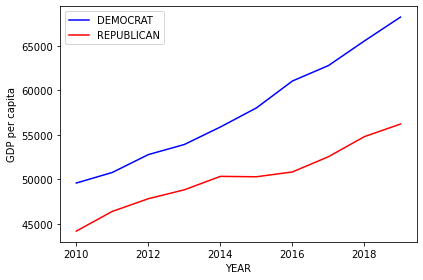

<Figure size 432x288 with 0 Axes>

In [32]:
# Examining other determinants

l=['GDP_pc']
# import seaborn as sns
# import matplotlib.pyplot as plts

for v in l:

    g=sns.lineplot(data=GWG.groupby(['YEAR','party_simplified']).mean(),x='YEAR',y=v,hue='party_simplified',palette=['b','r'])
    g.legend_.set_title(None)
    plt.tight_layout()
    plt.ylabel('GDP per capita')
    #plt.ylim(0,100)
    plt.show()
#     s='Out/'+v+'.png'
#     plts.savefig(s,facecolor='w')
    plt.clf()
    

## Regressions
Two things will be examined here:
1. A correlation plot will help gauge whether there is multicollinearity amongst variables
2. A linear regression model will identify the determinants of GWG

### Checking correlations between variables

In [33]:
#Plotting Correlation matrix

corr =GWG.drop(columns=['STATEFIP', 'Inc_F','Inc_M','SEX', 'Year_imp','GWG','Unnamed: 0','Unnamed: 0.1','YEAR','GDP_pc','Black','AmIndian_AlaskaNative','Chinese','Japanese']).corr()

corr.style.background_gradient(cmap='Blues')
#.to_excel("corr.xlsx")

Findings:
1. Overall there does not seem to be multicollinearity
2. Some variables with relatively high correlation coefficients(>0.6) are:
- Proportion of youth and Percentage with children less than 5
- Log of GDP and Employment Rate
3. GWG has high correlation with Percentage of youth, Percentage with children, Percentage of white population, Married population, Percentage engaged in Construction industry

In [34]:
list(corr)

['Agelt30',
 'Child',
 'Child5',
 'White',
 'Prop_F',
 'College',
 'Mar',
 'Constr',
 'Pay_Transp',
 'Empt',
 'GWG_calc',
 'log_GDP',
 'DEMOCRAT']

### Linear Regression

In [35]:
import statsmodels.formula.api as smf

In [36]:
import numpy as np
from statsmodels.iolib.summary2 import summary_col

In [42]:
#OLS Regression


def reg(op,form):
    ols=smf.ols(formula=form,data=GWG).fit()
    path="Out/Reg/"+op+".csv"
    
    ols.params

    ols.conf_int()

    
    err_series=ols.params-ols.conf_int()[0]
    err_series


    coef_df=pd.DataFrame({'coef':ols.params.values[1:],
                         'err':err_series.values[1:],
                         'varname':err_series.index.values[1:]})

    coef_df
    



    print(coef_df['varname'].tolist())

    
    var_list=[ 'DEMOCRAT', 'Pay_Transp', 'DEMOCRAT:Pay_Transp','C(YEAR)[T.2011]', 'C(YEAR)[T.2012]', 'C(YEAR)[T.2013]', 'C(YEAR)[T.2014]', 'C(YEAR)[T.2015]', 'C(YEAR)[T.2016]', 'C(YEAR)[T.2017]', 'C(YEAR)[T.2018]', 'C(YEAR)[T.2019]', 'Agelt30', 'Child','Child5', 'White', 'Empt', 'Prop_F', 'College', 'Constr', 'Mar', 'log_GDP']
    df_list=[]
    for i in var_list:
        df_list.append(coef_df[coef_df['varname']==i])

    coef_df1=pd.concat(df_list)

    l=list(coef_df1['varname'].unique())


    

    
    fig,ax=plt.subplots(figsize=(10,2.5))
    coef_df1.plot(x='varname',y='coef',kind='bar',ax=ax,color='none',yerr='err',legend=False)
    ax.set_title('Regression Results of Model: '+op)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=pd.np.arange(coef_df1.shape[0]),marker='s',s=20,y=coef_df1['coef'],color='black',linewidth=4)
    ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.xaxis.set_ticks_position('none')
    _=ax.set_xticklabels(l,rotation=90,fontsize=16)

    return ols 




Year fixed effects(FE) have been used across variables. The following regression models were explored:
1. No State FE and no interactions
2. No State FE and interactions
3. State FE and no interactions
3. State FE and interactions

['C(YEAR)[T.2011]', 'C(YEAR)[T.2012]', 'C(YEAR)[T.2013]', 'C(YEAR)[T.2014]', 'C(YEAR)[T.2015]', 'C(YEAR)[T.2016]', 'C(YEAR)[T.2017]', 'C(YEAR)[T.2018]', 'C(YEAR)[T.2019]', 'DEMOCRAT', 'Pay_Transp', 'Agelt30', 'Child5', 'White', 'Prop_F', 'College', 'Constr', 'Mar', 'Empt', 'log_GDP']
['C(YEAR)[T.2011]', 'C(YEAR)[T.2012]', 'C(YEAR)[T.2013]', 'C(YEAR)[T.2014]', 'C(YEAR)[T.2015]', 'C(YEAR)[T.2016]', 'C(YEAR)[T.2017]', 'C(YEAR)[T.2018]', 'C(YEAR)[T.2019]', 'DEMOCRAT', 'Pay_Transp', 'Agelt30', 'Child', 'White', 'Empt', 'Prop_F', 'College', 'Constr', 'Mar', 'log_GDP']
['C(YEAR)[T.2011]', 'C(YEAR)[T.2012]', 'C(YEAR)[T.2013]', 'C(YEAR)[T.2014]', 'C(YEAR)[T.2015]', 'C(YEAR)[T.2016]', 'C(YEAR)[T.2017]', 'C(YEAR)[T.2018]', 'C(YEAR)[T.2019]', 'DEMOCRAT', 'Pay_Transp', 'Child5', 'White', 'Black', 'AmIndian_AlaskaNative', 'Chinese', 'Japanese', 'Empt', 'Prop_F', 'College', 'Constr', 'Mar', 'log_GDP']


C:\Users\Sanya\AppData\Local\Temp/ipykernel_500/2807226696.py:47: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



['C(YEAR)[T.2011]', 'C(YEAR)[T.2012]', 'C(YEAR)[T.2013]', 'C(YEAR)[T.2014]', 'C(YEAR)[T.2015]', 'C(YEAR)[T.2016]', 'C(YEAR)[T.2017]', 'C(YEAR)[T.2018]', 'C(YEAR)[T.2019]', 'DEMOCRAT', 'Pay_Transp', 'Agelt30', 'Child', 'White', 'Prop_F', 'College', 'Constr', 'Mar', 'log_GDP']
['C(YEAR)[T.2011]', 'C(YEAR)[T.2012]', 'C(YEAR)[T.2013]', 'C(YEAR)[T.2014]', 'C(YEAR)[T.2015]', 'C(YEAR)[T.2016]', 'C(YEAR)[T.2017]', 'C(YEAR)[T.2018]', 'C(YEAR)[T.2019]', 'DEMOCRAT', 'Pay_Transp', 'Agelt30', 'Child', 'White', 'Prop_F', 'College', 'Constr', 'Mar', 'Empt']
['C(YEAR)[T.2011]', 'C(YEAR)[T.2012]', 'C(YEAR)[T.2013]', 'C(YEAR)[T.2014]', 'C(YEAR)[T.2015]', 'C(YEAR)[T.2016]', 'C(YEAR)[T.2017]', 'C(YEAR)[T.2018]', 'C(YEAR)[T.2019]', 'DEMOCRAT', 'Pay_Transp', 'DEMOCRAT:Pay_Transp', 'Agelt30', 'Child', 'White', 'Empt', 'Prop_F', 'College', 'Constr', 'Mar', 'log_GDP']
['C(YEAR)[T.2011]', 'C(YEAR)[T.2012]', 'C(YEAR)[T.2013]', 'C(YEAR)[T.2014]', 'C(YEAR)[T.2015]', 'C(YEAR)[T.2016]', 'C(YEAR)[T.2017]', 'C(YEAR)[T

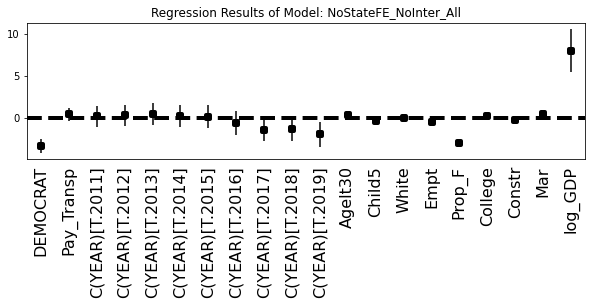

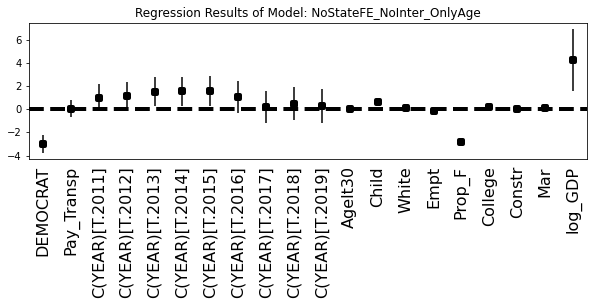

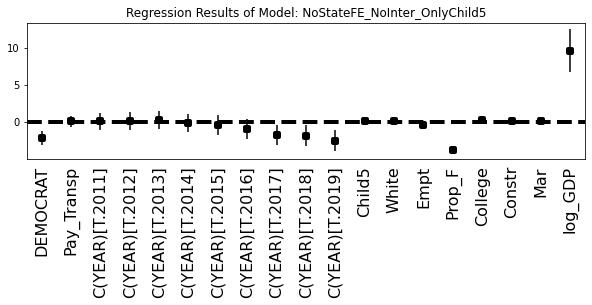

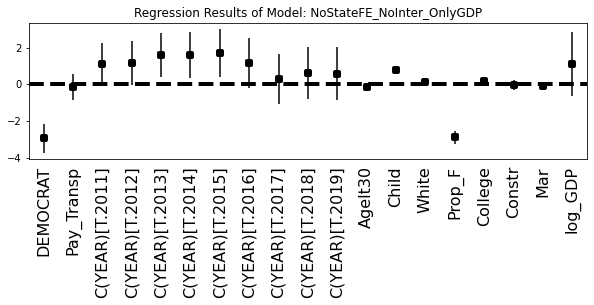

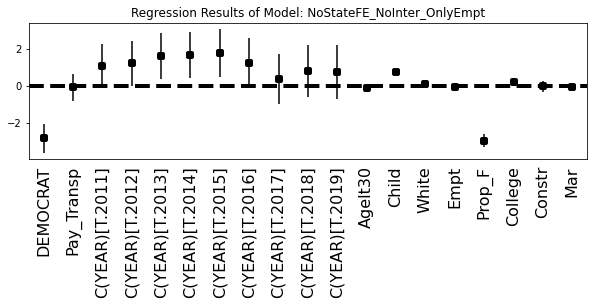

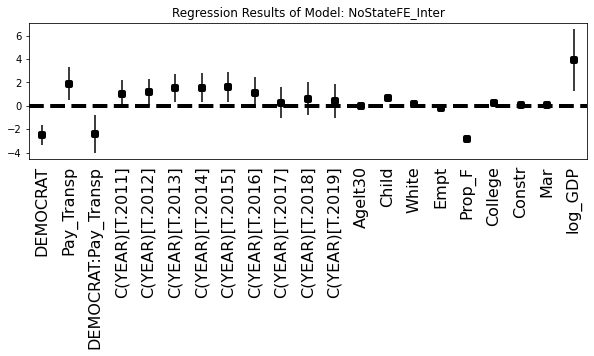

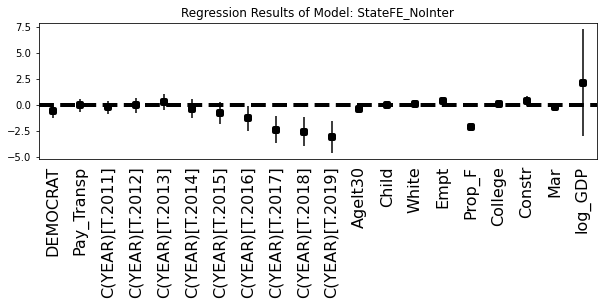

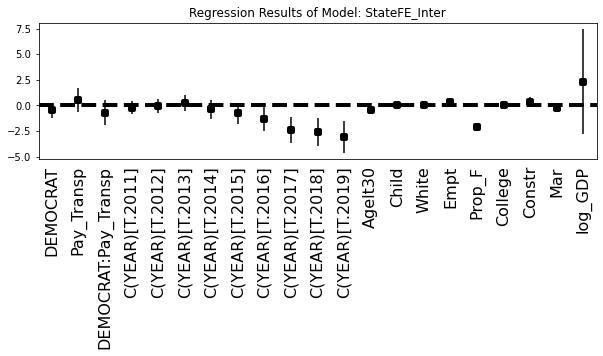

In [43]:
#Trying different models

## No State FE and No Interactions
### All variables
m1=reg("NoStateFE_NoInter_All","GWG_calc~C(YEAR)+DEMOCRAT+Pay_Transp+Agelt30+Child5+White+Prop_F+College+Constr+Mar+Empt+log_GDP")

####Trying combinations of variables with relatively high correlation coefficients
# Youth vs Children less than 5
m2=reg("NoStateFE_NoInter_OnlyAge","GWG_calc~C(YEAR)+DEMOCRAT+Pay_Transp+Agelt30+Child+White+Empt+Prop_F+College+Constr+Mar+log_GDP")
m3=reg("NoStateFE_NoInter_OnlyChild5","GWG_calc~C(YEAR)+DEMOCRAT+Pay_Transp+Child5+White+Black+AmIndian_AlaskaNative+Chinese+Japanese+Empt+Prop_F+College+Constr+Mar+log_GDP")

# GDP vs Employment Rate
m4=reg("NoStateFE_NoInter_OnlyGDP","GWG_calc~C(YEAR)+DEMOCRAT+Pay_Transp+Agelt30+Child+White+Prop_F+College+Constr+Mar+log_GDP")
m5=reg("NoStateFE_NoInter_OnlyEmpt","GWG_calc~C(YEAR)+DEMOCRAT+Pay_Transp+Agelt30+Child+White+Prop_F+College+Constr+Mar+Empt")

#Using model 2(i.e. NoStateFE_NoInter_OnlyAge) for remaining regressions
## No State FE and interactions
m6=reg("NoStateFE_Inter","GWG_calc~C(YEAR)+DEMOCRAT*Pay_Transp+Agelt30+Child++White+Empt+Prop_F+College+Constr+Mar+log_GDP")

# ## State FE and no interactions
# m7=reg("NoStateFE_NoInter","GWG_calc~C(YEAR)+DEMOCRAT+Pay_Transp+Agelt30+Child+White+Empt+Prop_F+College+Constr+Mar+log_GDP")

##State FE and no interactions
m7=reg("StateFE_NoInter","GWG_calc~C(YEAR)+C(state)+DEMOCRAT+Pay_Transp+Agelt30+Child+White+Empt+Prop_F+College+Constr+Mar+log_GDP")

## State FE and interactions
m8=reg("StateFE_Inter","GWG_calc~C(YEAR)+C(state)+DEMOCRAT*Pay_Transp+Agelt30+Child+White+Empt+Prop_F+College+Constr+Mar+log_GDP")


Findings:
1. Across models without State FE, the following significant variables have a relationship with GWG:
- Positive coefficient: log GDP, Percentage with children
- Negative coefficient: Democrat and Proportion of Females
2. Inclusion of interactions makes Presence of pay transparency law significant (this seems counter-intuitive)
3. Interaction term of Democrat and Pay Transparency variable has a negative relationship which seems due to effect of Democrat variable
4. In models with state FE, coefficients for years 2016-2019 are significant too. The state FE could be pulling significance away from the Democrat variable

In [44]:
#Plotting State coefficients for models with State FE

def reg_state(op,form):
    ols=smf.ols(formula=form,data=GWG).fit()
        #path="Out/Reg/"+op+".csv"

    ols.params

    ols.conf_int()


    err_series=ols.params-ols.conf_int()[0]
    err_series


    coef_df=pd.DataFrame({'coef':ols.params.values[1:],
                             'err':err_series.values[1:],
                             'varname':err_series.index.values[1:]})

    coef_df1=coef_df[coef_df['varname'].str.contains("state")].sort_values(by='coef')






    fig,ax=plt.subplots(figsize=(10,2.5))
    coef_df1.plot(x='varname',y='coef',kind='bar',ax=ax,color='none',yerr='err',legend=False)
    ax.set_title('Regression Results of Model: '+op)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=pd.np.arange(coef_df1.shape[0]),marker='s',s=20,y=coef_df1['coef'],color='black',linewidth=4)
    ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.xaxis.set_ticks_position('none')
    #_=ax.set_xticklabels(rotation=90,fontsize=16)

    return ols 




C:\Users\Sanya\AppData\Local\Temp/ipykernel_500/4222629772.py:32: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



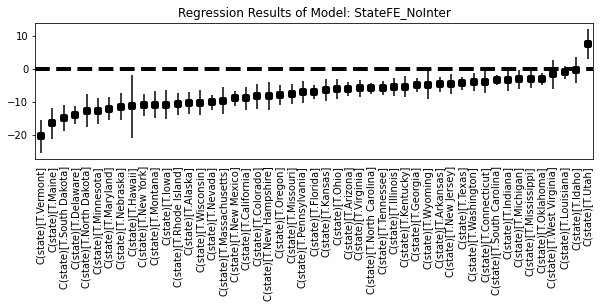

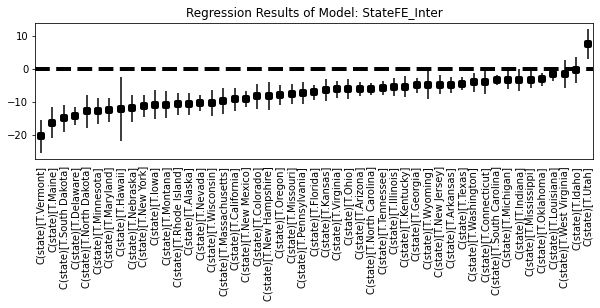

In [45]:
##State FE and no interactions
m7=reg_state("StateFE_NoInter","GWG_calc~C(YEAR)+C(state)+DEMOCRAT+Pay_Transp+Agelt30+Child+White+Empt+Prop_F+College+Constr+Mar+log_GDP")

## State FE and interactions
m8=reg_state("StateFE_Inter","GWG_calc~C(YEAR)+C(state)+DEMOCRAT*Pay_Transp+Agelt30+Child+White+Empt+Prop_F+College+Constr+Mar+log_GDP")


Findings
- States with highest GWG: Utah
- States with lowest GWG: Vermont, Maine, South Dakota, Delaware,North Dakota

In [ ]:
#Printing OLS Summary

print(m7.summary())